mnist 数据分类KNN
基本思路：
- 数据导入与划分
    - 分别导入x,y
    - 可以进行可视化看看，灰度
    - 随机打乱
    - 划分训练集和测试集
- KNN判别器
    - 参数：k和类别数量
    - fit，获取训练的数据和标签
    - 计算距离的函数
    - 排序函数
    - 统计类别的次数
    - 预测函数，返回最大次数对应的列别
- 使用：输入超参数进行实例化，调用相应的方法
- 输出

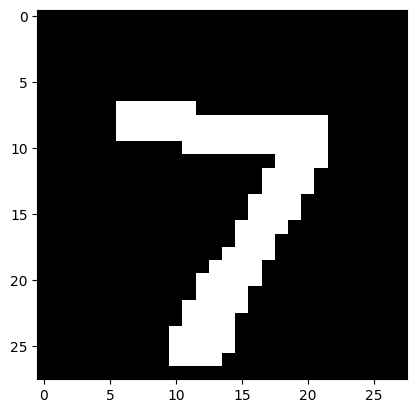

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import os

m_x=np.loadtxt('mnist_x',delimiter=' ')
m_y=np.loadtxt('mnist_y')

# reshape
new_x=np.reshape(np.array(m_x[0],int),[28,28])
# 灰度与可视化
plt.imshow(new_x, cmap='gray')
plt.show()
#随机打乱
# 生成长度为m_x的长度的一个range，然后随机打乱，作为索引
index=np.arange(len(m_x))
np.random.shuffle(index)
m_x=m_x[index]
m_y=m_y[index]
# 已经随机打乱，接下来进行训练集和测试集的划分，比例0.8
ratio=0.8
num_x=int(ratio*len(m_x))
x_train,x_test=m_x[:num_x],m_x[num_x:]
y_train,y_test=m_y[:num_x],m_y[num_x:]




In [43]:
# 定义距离函数
def get_dis(a,b):
    return np.sqrt(np.sum((a-b)**2))

dis = np.array([30, 10, 20])
sorted_indices = np.argsort(dis)
array([1, 2, 0])

np.argmax(label_statistic)
用于找出数组中最大值所在的位置（索引值）。而不是最大值本身，是最大值的 位置索引。

In [ ]:
class KNN:
    def __init__(self,K,num_label):
        self.k=K
        self.num=num_label
    def fit(self,x,y):
        self.x_train=x
        self.y_train=y
    def get_k_index(self,x):
        dis=list(map(lambda a:get_dis(a,x),x_train))
        index=np.argsort(dis)
        return index[:self.k]
    def get_max_label(self,x):
        inex=get_k_index(x)
        label_count=np.zeros(self.num)
        for i in indx:
            label_count[int(y_train[i])]+=1
        return argmax(label_count)


In [44]:
class KNN:
    def __init__(self,k,num_label):
        self.k=k
        self.num_label=num_label
    def fit(self,x_t,y_t):
        self.x_train=x_t
        self.y_train=y_t
    # def predict(a):    
    #     x_train_sorted=sorted(x_train,key=lambda x:get_dis(x,a))
    #     X_train_sorted=x_train_sorted[:k]
    #     label_count=np.zeros(num_label)
    #     for i in x_train_sorted:
    #        label_i= get_the_label_of(i)
    #        label_count[label_i]+=1
    #     label=find_max_of_label_count
    #     return label

    # def predict(self,a):
    #     #生成索引和x_train
    #     index_train=list(enumerate(self.x_train))
    #     x_train_sorted=sorted(index_train,key=lambda item: get_dis(item[1],a))
    #     k_list=[index for index,_ in x_train_sorted[:self.k]]
    #     label_count=np.zeros(self.num_label)
    #     for i in k_list:
    #         ind=int(self.y_train[i])
    #         label_count[ind]+=1
    #     label=np.argmax(label_count)
    #     return label
    def get_index(self,x):
        dis=list(map(lambda a:get_dis(a,x),self.x_train))
        knn_index=np.argsort(dis)
        knn_index=knn_index[:self.k]
        return knn_index
    def get_label(self,x):
        knn_index=self.get_index(x)
        knn_label=np.zeros(shape=[self.num_label])
        for i in knn_index:
            y_label=int(y_train[i])
            knn_label[y_label]+=1
        return np.argmax(knn_label)
    def predict(self,x_test):
        pre_x_test=np.zeros(shape=[len(x_test)],dtype=int)
        for i,x in enumerate(x_test):
            pre_x_test[i]=self.get_label(x)
        return pre_x_test
    


In [45]:
for i in range(1,15):
    k=KNN(i,10)
    k.fit(x_train,y_train)
    x=k.get_label(x_test[1])
    print(f"K={i},x_test[1] prediction is {x}")
    x_test_pre=k.predict(x_test)
    accuracy=np.mean(x_test_pre==y_test)
    print(f"K={i},accuracy is {accuracy * 100:.1f}%")

K=1,x_test[1] prediction is 1
K=1,accuracy is 85.0%
K=2,x_test[1] prediction is 1
K=2,accuracy is 83.0%
K=3,x_test[1] prediction is 1
K=3,accuracy is 84.0%
K=4,x_test[1] prediction is 1
K=4,accuracy is 85.5%
K=5,x_test[1] prediction is 1
K=5,accuracy is 85.0%
K=6,x_test[1] prediction is 1
K=6,accuracy is 85.0%
K=7,x_test[1] prediction is 1
K=7,accuracy is 84.5%
K=8,x_test[1] prediction is 1
K=8,accuracy is 83.5%
K=9,x_test[1] prediction is 1
K=9,accuracy is 80.5%
K=10,x_test[1] prediction is 1
K=10,accuracy is 82.0%
K=11,x_test[1] prediction is 1
K=11,accuracy is 82.0%
K=12,x_test[1] prediction is 1
K=12,accuracy is 81.0%
K=13,x_test[1] prediction is 1
K=13,accuracy is 81.0%
K=14,x_test[1] prediction is 1
K=14,accuracy is 80.0%


高斯数据集
- 可视化
- 划分格点
- 将现有的这些带有标注的点进行fit，得到一个有预测功能的模型
- 输入格点数据，进行预测
- 将格点采用合理的方式输出、可视化

数据集大小： 200


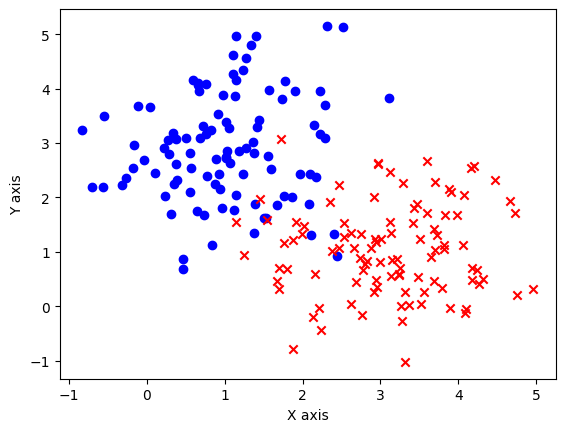

In [46]:
# 使用scikit-learn实现KNN
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap

data=np.loadtxt('gauss.csv',delimiter=',')
x_train=data[:,:2]
y_train=data[:,2]
print('数据集大小：', len(x_train) )
plt.figure()
plt.scatter(x_train[y_train==0,0],x_train[y_train==0,1],c='blue',marker='o')
plt.scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], c='red', marker='x')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()

In [47]:
# 构造网格
step=0.02
x_min,x_max=np.min(data[:,0])-1,np.max(x_train[:, 0]) + 1
y_min, y_max = np.min(x_train[:, 1]) - 1, np.max(x_train[:, 1]) + 1
#本质上是在做一个“排列组合”，先排列，然后再按照1轴进行合并
xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
grid_data = np.concatenate([xx.reshape(-1, 1), yy.reshape(-1, 1)], axis=1)

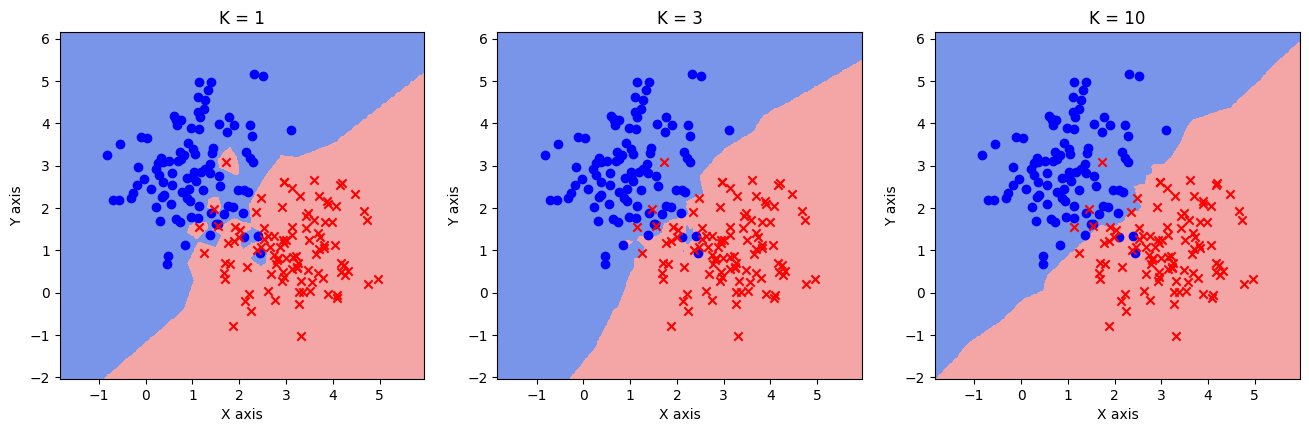

In [48]:
fig = plt.figure(figsize=(16,4.5))
# K值，读者可以自行调整，观察分类结果的变化
ks = [1, 3, 10]
cmap_light = ListedColormap(['royalblue', 'lightcoral'])
for i,k in enumerate(ks):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    z=knn.predict(grid_data)

    # 画出分类结果
    ax = fig.add_subplot(1, 3, i + 1)
    ax.pcolormesh(xx, yy, z.reshape(xx.shape), cmap=cmap_light, alpha=0.7)
    ax.scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], c='blue', marker='o')
    ax.scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], c='red', marker='x')

    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_title(f'K = {k}')
plt.show()

In [1]:
# 图像输入输出
from skimage import io # 图像输入输出
from skimage.color import rgb2lab, lab2rgb # 图像通道转换
from sklearn.neighbors import KNeighborsRegressor # KNN 回归器
import os
path = 'style_transfer'
data_dir = os.path.join(path, 'vangogh')
# 存储原始风格图像
block_size=3
#彩色图像LAB
def read_style_image(file_name,size=block_size):

    img=io.imread(file_name)

    fig=plt.figure()
    plt.imshow(img)
    plt.xlabel('X axis')
    plt.ylabel('Y axis')
    plt.show()

    #转换为LAB
    img=rgb2lab(img)
    #高度和宽度
    w,h=img.shape[:2]

    X=[]
    Y=[]

    for x in range(size,w-size):#中心点的索引
        for y in range(size,h-size):
            X.append(img[x-size:x+size+1,y-size:y+size+1,0].flatten())#保存窗口
            Y.append(img[x,y,1:])#保存色彩值
    return X,Y


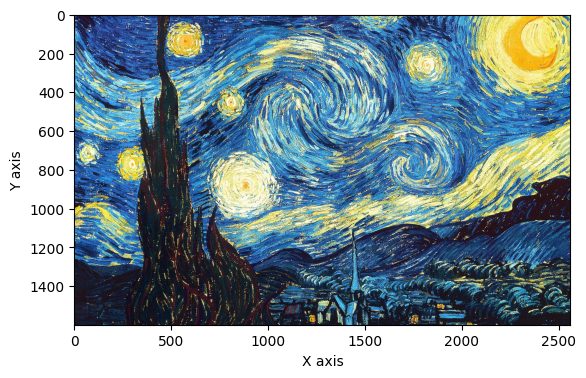

KNeighborsRegressor(n_neighbors=4, weights='distance')

In [3]:
import matplotlib.pyplot as plt
# 使用刚刚定义的函数
X,Y=read_style_image(os.path.join(path,'style.jpg'))

knn=KNeighborsRegressor(n_neighbors=4,weights='distance')
knn.fit(X,Y)

In [6]:
import numpy as np
# 现在已经将中心点的窗口（包含周围）以及中心点的色彩
def rebuild(img,size=block_size):
    # 打印内容图像
    print('打印灰度图')
    fig = plt.figure()
    plt.imshow(img)
    plt.xlabel('X axis')
    plt.ylabel('Y axis')
    plt.show()
    # 将内容图像转为LAB表示
    img = rgb2lab(img) 
    w, h = img.shape[:2]

    # 初始化输出图像对应的矩阵
    photo = np.zeros([w, h, 3])
    # 枚举内容图像中心点，保存窗口
    X=[]
    for x in range(size,w-size):
        for y in range(size,h-size):
            window=img[x-size:x+size+1,y-size:y+size+1,0].flatten()
            X.append(window)
    X=np.array(X)

    #使用KNN回归器预测颜色
    print("predictin……")
    pred_ab=knn.predict(X).reshape(w-2*size,h-2*size,-1)
    # 设置输出图像
    photo[:,:,0]=img[:,:,0]
    photo[size:w-size,size:h-size,1:]=pred_ab

    photo=photo[size:w-size,size:h-size,:]
    return photo        

打印灰度图


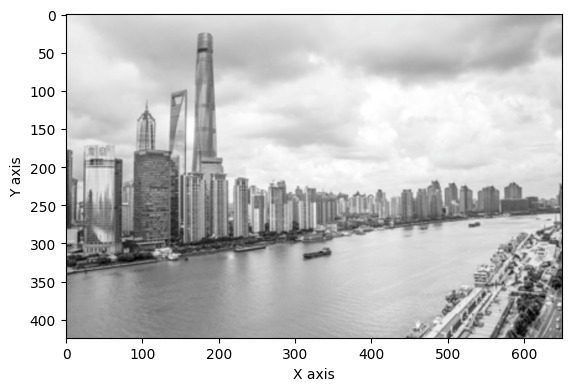

predictin……


In [ ]:
content=io.imread(os.path.join(path,'input.jpg'))
new_photo=rebuild(content)

new_photo=lab2rgb(new_photo)

fig=plt.figure()
plt.imshow(new_photo)
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()

#### 如果采用多张图片的窗口
KNN 上色的结果通常会显得不自然，其根本原因在于它仅基于“局部窗口像素距离”进行匹配，缺乏上下文理解与全局风格控制。

✅ KNN 在图像任务中容易受到以下因素影响：特征选择、距离度量、样本分布、上下文信息、K值设置等。
注意点
说明
✅ 特征表示很关键
使用原始像素作为特征往往效果很差；可以使用高维特征（如卷积特征）进行匹配。
✅ 上下文信息缺失
KNN 是局部模型，缺乏对图像结构的理解，适合低复杂度任务。
✅ 数据量限制
若训练集样本不够，容易导致过拟合或泛化失败。
✅ 不考虑连续性
相邻 patch 匹配时若无平滑机制，会产生不连续边界。
✅ 距离度量敏感
欧氏距离未必是最优的相似性判断标准，需根据任务调整。
